# Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from tensorflow import keras
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '../../')
from plot_graphs import plot_loss, plot_acc

# Setting Image and Batch Size

In [2]:
IMAGE_SIZE = 100
BATCH_SIZE = 32

# Loading the train, val, and test data

In [3]:
train = utils.image_dataset_from_directory("../../datasets/data/split/VTID2/train", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
val = utils.image_dataset_from_directory("../../datasets/data/split/VTID2/val", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
test = utils.image_dataset_from_directory("../../datasets/data/split/VTID2/test", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

Found 3048 files belonging to 5 classes.
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Found 652 files belonging to 5 classes.
Found 656 files belonging to 5 classes.


2022-08-07 15:49:40.327911: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-07 15:49:40.328019: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Defining the model

In [4]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation='softmax')(x)

model = keras.Model(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                         

# Adding Callbacks

In [5]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=8
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="../../models/vtid2/m2_medium.h5",
        monitor="val_accuracy",
        save_best_only=True
    )
]

# Running the model

In [6]:
history = model.fit(
  train.cache(),
  epochs=40,
  callbacks=callbacks_list,
  validation_data=val.cache()
)

Epoch 1/40


2022-08-07 15:49:41.116664: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-07 15:49:41.116752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 1.5395 - accuracy: 0.3064

2022-08-07 15:49:47.756277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 8s 55ms/step - loss: 1.5395 - accuracy: 0.3064 - val_loss: 1.3973 - val_accuracy: 0.4893
Epoch 2/40
96/96 [==============================] - 4s 44ms/step - loss: 1.4296 - accuracy: 0.4291 - val_loss: 1.2122 - val_accuracy: 0.5383
Epoch 3/40
96/96 [==============================] - 4s 45ms/step - loss: 1.2723 - accuracy: 0.5069 - val_loss: 1.1896 - val_accuracy: 0.5307
Epoch 4/40
96/96 [==============================] - 4s 43ms/step - loss: 1.0786 - accuracy: 0.5886 - val_loss: 0.8793 - val_accuracy: 0.6396
Epoch 5/40
96/96 [==============================] - 4s 43ms/step - loss: 0.8959 - accuracy: 0.6549 - val_loss: 0.8214 - val_accuracy: 0.6779
Epoch 6/40
96/96 [==============================] - 4s 45ms/step - loss: 0.7651 - accuracy: 0.7103 - val_loss: 0.8452 - val_accuracy: 0.6488
Epoch 7/40
96/96 [==============================] - 4s 44ms/step - loss: 0.6559 - accuracy: 0.7503 - val_loss: 0.7154 - val_accuracy: 0.7224
Epoch 8/40
96/96 [======

# Evaluating the model

In [7]:
# model.evaluate(test)

load_model = keras.models.load_model("../../models/vtid2/m2_medium.h5")
load_model.evaluate(test)

 1/21 [>.............................] - ETA: 4s - loss: 0.0024 - accuracy: 1.0000

2022-08-07 15:52:21.307258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 20ms/step - loss: 0.0779 - accuracy: 0.9863


[0.07787609845399857, 0.9862805008888245]

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/pyplot.py'>

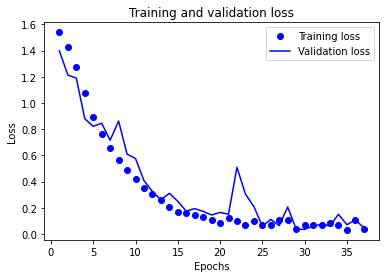

In [8]:
# Plotting loss and accuracy graphs
## Plotting loss
plot_loss(history)


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/pyplot.py'>

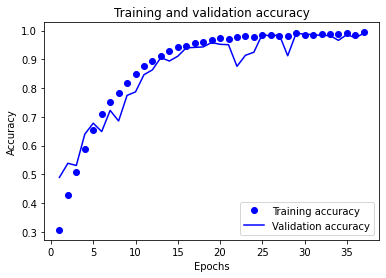

In [9]:
## Plotting accuracy
plot_acc(history)